In [95]:
# modules we'll use
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

def summerize_data(df):
    for column in df.columns:
        print (column)
        if df.dtypes[column] == np.object: # Categorical data
            print (df[column].value_counts())
        else:
            print (df[column].describe()) 
            
        print ('\n')


In [91]:
country_d=pd.read_csv("F:\Study\DataEn\Db_Project\Country.csv",low_memory=False)

league_d=pd.read_csv("F:\Study\DataEn\Db_Project\League.csv",low_memory=False)
match_d=pd.read_csv("F:\Study\DataEn\Db_Project\Match.csv",low_memory=False)
player_d=pd.read_csv("F:\Study\DataEn\Db_Project\Player.csv",low_memory=False)
player_a_d=pd.read_csv("F:\Study\DataEn\Db_Project\Player_Attributes.csv",low_memory=False)
team_d=pd.read_csv("F:\Study\DataEn\Db_Project\Team1.csv")
team_a_d=pd.read_csv("F:\Study\DataEn\Db_Project\Team_Attributes.csv",low_memory=False)


In [92]:
# display(match_d['away_player_X1'].isnull())
match_d = match_d.dropna(how='any',axis=0)
c=match_d.columns[77:115]
p=missing_values_count_player
match_d=match_d.drop(c, axis=1)
count=player_d.isnull().sum()
missing_values_count_match = match_d.isnull().sum()
print(count)

print(missing_values_count_match)




id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64
id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
home_player_X1      0
home_player_X2      0
home_player_X3      0
home_player_X4      0
home_player_X5      0
home_player_X6      0
home_player_X7      0
home_player_X8      0
home_player_X9      0
home_player_X10     0
home_player_X11     0
away_player_X1      0
away_player_X2      0
away_player_X3      0
away_player_X4      0
away_player_X5      0
away_player_X6      0
away_player_X7      0
away_player_X8      0
                   ..
away_player_Y4      0
away_player_Y5      0
away_player_Y6      0
away_player_Y7      0
away_player_Y8      0
away_player_Y9      0
away_

In [127]:
df1=match_d[match_d['home_player_X1']==1 ]
df2= df1[df1['home_player_Y1']==1]
gk_d=df2.filter(['home_player_X1','home_player_Y1','home_player_1','home_team_api_id','league_id' ],axis=1)
gk_d1=pd.merge(gk_d, player_d, left_on="home_player_1", right_on="player_api_id")
gk_d1=gk_d1.drop_duplicates(subset="player_name")
gk_d1=gk_d1.filter(["id",'player_api_id','player_name','height','weight','league_id','home_team_api_id'])
gk_d2=pd.merge(gk_d1,player_a_d, left_on="player_api_id", right_on="player_api_id")
gk_d2=gk_d2.drop_duplicates(subset="player_api_id")
gk_a_d=gk_d2.filter(["id",'overall_rating','player_api_id','player_name','height','weight','league_id','home_team_api_id','reactions','jumping','strength','gk_diving','gk_handling','gd_positioning','gk_reflexes'])
display(gk_a_d)
summerize_data(gk_a_d)


,overall_rating,player_api_id,player_name,height,weight,league_id,home_team_api_id,reactions,jumping,strength,gk_diving,gk_handling,gk_reflexes
0,78.0,169718,Wojciech Szczesny,195.58,185,1729,9825,76.0,38.0,61.0,83.0,74.0,84.0
23,79.0,31465,Tim Howard,190.50,194,1729,8668,83.0,75.0,71.0,82.0,76.0,79.0
47,73.0,30633,Mark Schwarzer,193.04,209,1729,9879,76.0,55.0,70.0,70.0,73.0,69.0
76,84.0,31432,Joe Hart,195.58,201,1729,8456,80.0,72.0,61.0,84.0,81.0,88.0
113,78.0,24229,Tim Krul,193.04,181,1729,10261,76.0,69.0,60.0,81.0,77.0,83.0
135,76.0,36374,Robert Green,190.50,205,1729,10172,74.0,68.0,59.0,83.0,70.0,83.0
156,73.0,38617,Adam Federici,187.96,198,1729,9798,72.0,73.0,72.0,75.0,69.0,75.0
176,79.0,24147,Ben Foster,193.04,198,1729,8659,72.0,75.0,57.0,81.0,78.0,84.0
196,69.0,23932,Jussi Jaaskelainen,190.50,176,1729,8654,65.0,58.0,65.0,73.0,67.0,67.0
223,68.0,25156,Ali Al-Habsi,193.04,174,1729,8528,73.0,74.0,64.0,68.0,58.0,71.0


overall_rating
count    190.000000
mean      74.163158
std        5.537722
min       60.000000
25%       70.000000
50%       74.000000
75%       78.000000
max       90.000000
Name: overall_rating, dtype: float64


player_api_id
count       190.000000
mean      68483.526316
std       69521.868899
min       11319.000000
25%       30202.250000
50%       37545.000000
75%       74724.250000
max      414788.000000
Name: player_api_id, dtype: float64


player_name
German Dario Lux           1
Adam Federici              1
Julio Cesar                1
Ben Foster                 1
Gianluca Curci             1
Dudu Aouate                1
Asmir Begovic              1
Casto Espinosa             1
Joan Hartock               1
Sergio Romero              1
Gerhard Tremmel            1
Tim Wiese                  1
Rene Adler                 1
Tim Howard                 1
Francisco Casilla          1
Jose Manuel Pinto          1
Adrian                     1
Antonio Rosati             1
Diego Lopez     

In [138]:
le_en_d=gk_a_d.loc[gk_a_d['league_id'] == 1729]
le_fr_d=gk_a_d.loc[gk_a_d['league_id'] == 4769]
le_gr_d=gk_a_d.loc[gk_a_d['league_id'] == 7809]
le_it_d=gk_a_d.loc[gk_a_d['league_id'] == 10257]
le_sp_d=gk_a_d.loc[gk_a_d['league_id'] == 21518]
print("england")
summerize_data(le_en_d)
print("france")

summerize_data(le_fr_d)
print("germany")


summerize_data(le_gr_d)
print("italy")


summerize_data(le_it_d)
print("spain")

summerize_data(le_sp_d)







england
overall_rating
count    40.000000
mean     75.200000
std       5.648689
min      65.000000
25%      71.750000
50%      75.000000
75%      78.250000
max      87.000000
Name: overall_rating, dtype: float64


player_api_id
count        40.00000
mean      50998.65000
std       55930.57025
min       22978.00000
25%       24519.50000
50%       30981.50000
75%       37391.75000
max      278285.00000
Name: player_api_id, dtype: float64


player_name
Brad Friedel          1
Boaz Myhill           1
Lukasz Fabianski      1
Asmir Begovic         1
Petr Cech             1
Tim Krul              1
Adam Federici         1
Tim Howard            1
Ross Turnbull         1
Robert Green          1
Joel Robles           1
John Ruddy            1
David Stockdale       1
Pepe Reina            1
Anders Lindegaard     1
Ali Al-Habsi          1
Simon Mignolet        1
David De Gea          1
Alex McCarthy         1
Mark Bunn             1
Brad Guzan            1
Vito Mannone          1
Shay Given        

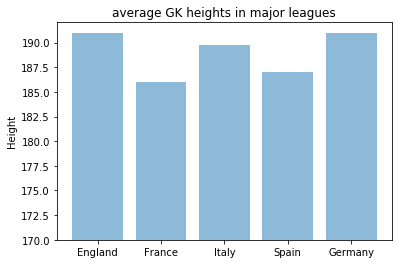

In [163]:

leagues = ('England', 'France', 'Italy', 'Spain', 'Germany')
y_pos = np.arange(len(leagues))
# y_pos=[170:200]
height = [191-170,186-170,189.8-170,187-170,190.99-170]

plt.bar(y_pos, height, align='center',bottom=170 , alpha=0.5)
plt.xticks(y_pos, leagues)
plt.ylabel('Height')
plt.title('average GK heights in major leagues')

plt.show()
# Tallest Gk playes in England and Germany

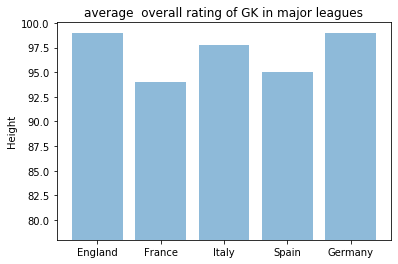

In [162]:
leagues = ('England', 'France', 'Italy', 'Spain', 'Germany')
y_pos = np.arange(len(leagues))

rank = [87-78,83-78,84-78,86-78,90-78]

plt.bar(y_pos, height, align='center',bottom=78 , alpha=0.5)
plt.xticks(y_pos, leagues)
plt.ylabel('Height')
plt.title('average  overall rating of GK in major leagues')

plt.show()

SyntaxError: invalid syntax (<ipython-input-143-6f7ba7168e88>, line 1)